<a href="https://colab.research.google.com/github/mborowik/zajecia/blob/main/bk_ml_klasyfikacja_19_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd

In [190]:
! git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


# Naive Bayes

In [191]:
iris=pd.read_csv('ML-datasets/iris.csv')

In [192]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [193]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [194]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [195]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [196]:
y=iris.pop('species').astype('category').cat.codes

In [197]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [198]:
X=iris

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

In [201]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [202]:
y_mnb=mnb.predict(X_test)

In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_mnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.46      1.00      0.63         6
           2       1.00      0.36      0.53        11

    accuracy                           0.77        30
   macro avg       0.82      0.79      0.72        30
weighted avg       0.89      0.77      0.76        30



In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
confusion_matrix(y_test, y_mnb)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  7,  4]])

In [206]:
wine=pd.read_csv('ML-datasets/wine.csv')

In [207]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


In [208]:
wine.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [209]:
y=wine.pop('Class').astype('category').cat.codes

In [210]:
X=wine

In [211]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [212]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=12)

In [213]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [214]:
y_pred=mnb.predict(X_test)

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.80      0.73      0.76        11
           2       0.79      1.00      0.88        11

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.85        36
weighted avg       0.87      0.86      0.86        36



In [216]:
confusion_matrix(y_test, y_pred)

array([[12,  2,  0],
       [ 0,  8,  3],
       [ 0,  0, 11]])

In [217]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [218]:
normalizer=Normalizer()

In [219]:
standardizer=StandardScaler()

In [220]:
normalizer.fit(X)
X_norm=normalizer.transform(X.values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


In [221]:
X_norm

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

In [222]:
X_n=X.copy()

In [223]:
X_n.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [224]:
X_n[:]=X_norm

In [225]:
X_n.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [226]:
X_n.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


In [227]:
X_train, X_test, y_train, y_test=train_test_split(X_n, y, test_size=0.2, random_state=12)

In [228]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [229]:
y_pred=mnb.predict(X_test)

In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        11
           2       0.31      1.00      0.47        11

    accuracy                           0.31        36
   macro avg       0.10      0.33      0.16        36
weighted avg       0.09      0.31      0.14        36



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 14],
       [ 0,  0, 11],
       [ 0,  0, 11]])

In [232]:
standardizer.fit(X)
X_stand=standardizer.transform(X.values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [233]:
X_s=X.copy()

In [234]:
X_s[:]=X_stand

In [235]:
X_s.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [236]:
X_s.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [237]:
X_train, X_test, y_train, y_test=train_test_split(X_s, y, test_size=0.2, random_state=123)

In [238]:
#mnb=MultinomialNB()
#mnb.fit(X_train, y_train)

In [239]:
from sklearn.preprocessing import KBinsDiscretizer

In [240]:
disc=KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

In [241]:
disc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [242]:
X_disc=disc.transform(X)

In [243]:
X_disc

array([[2., 0., 1., ..., 1., 2., 1.],
       [1., 0., 1., ..., 1., 2., 1.],
       [1., 0., 2., ..., 1., 2., 1.],
       ...,
       [1., 2., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [2., 1., 2., ..., 0., 0., 0.]])

In [244]:
X_d=X.copy()

In [245]:
X_d[:]=X_disc

In [246]:
X_d.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
2,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0
3,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [247]:
X_d['Alcohol'].value_counts()

1.0    86
2.0    51
0.0    41
Name: Alcohol, dtype: int64

In [248]:
X_d['Ash'].value_counts()

1.0    125
2.0     37
0.0     16
Name: Ash, dtype: int64

In [249]:
X_train, X_test, y_train, y_test=train_test_split(X_d, y, test_size=0.2, random_state=123)

In [250]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [251]:
y_pred=mnb.predict(X_test)

In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        36
   macro avg       0.96      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36



In [253]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 17,  0],
       [ 1,  0, 10]])

# Drzewo decyzyjne

In [254]:
from sklearn.tree import DecisionTreeClassifier

In [255]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [256]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [257]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [258]:
y_pred_train=dt.predict(X_train)

In [259]:
y_pred_test=dt.predict(X_test)

In [260]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        60

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [261]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.94        17
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



In [262]:
dt.get_depth()

5

In [263]:
dt.get_n_leaves()

12

In [264]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [265]:
from sklearn.tree import plot_tree

In [266]:
import matplotlib.pyplot as plt

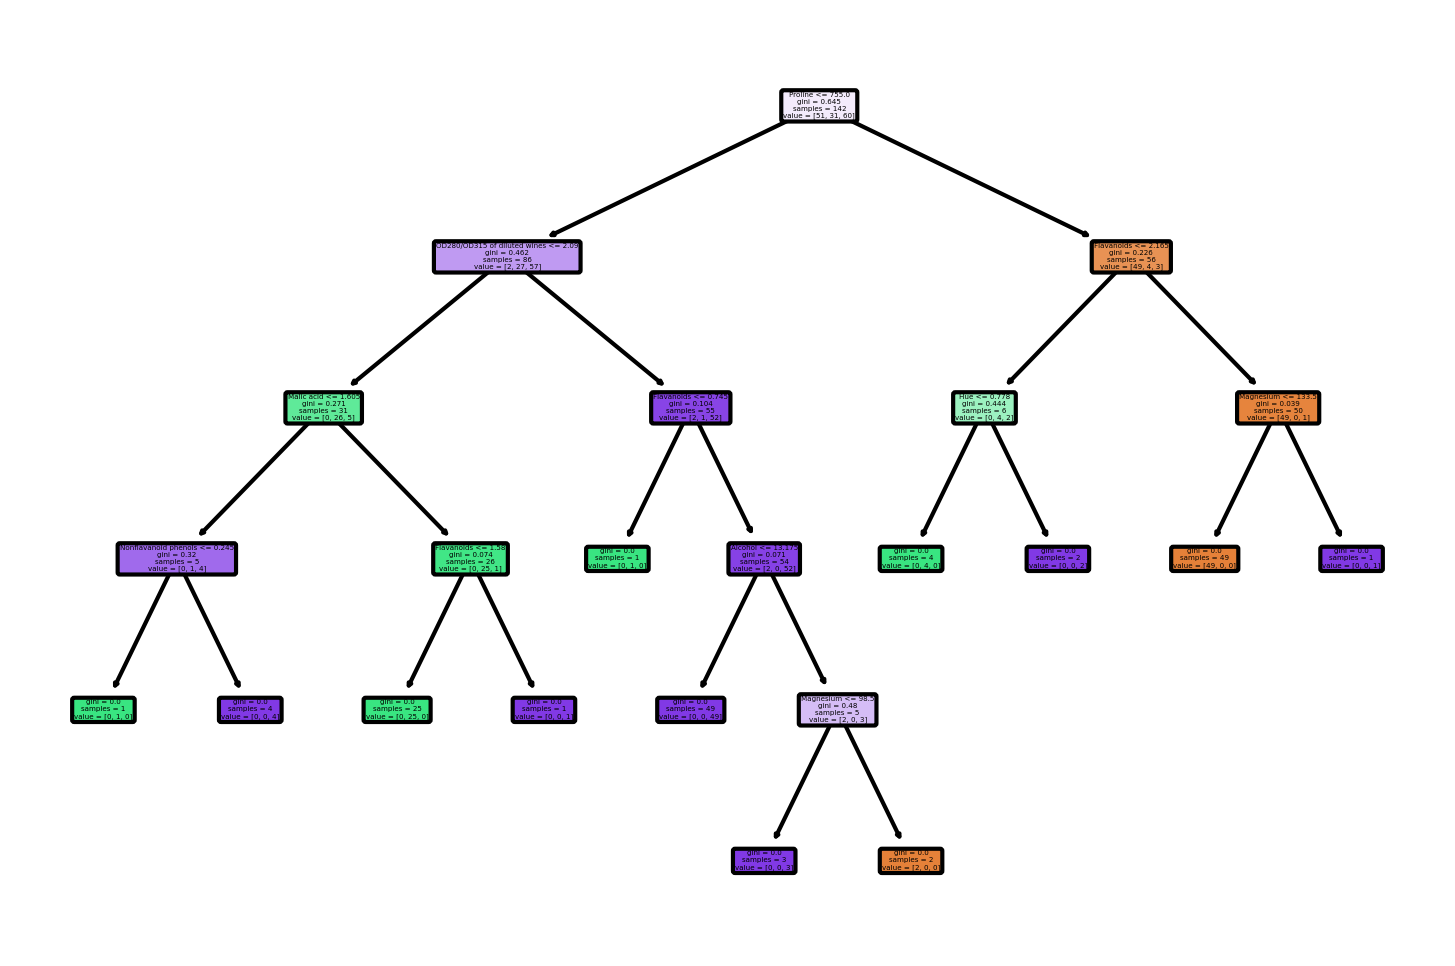

In [267]:
plt.figure(dpi=300)
plot_tree(dt, feature_names=list(X), rounded=True, filled=True)
plt.show()

In [268]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [269]:
y_pred_train=dt2.predict(X_train)
y_pred_test=dt2.predict(X_test)

In [270]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.93      0.87      0.90        31
           2       0.90      0.95      0.93        60

    accuracy                           0.94       142
   macro avg       0.94      0.93      0.93       142
weighted avg       0.94      0.94      0.94       142



In [271]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.71      0.83        17
           2       0.67      0.91      0.77        11

    accuracy                           0.83        36
   macro avg       0.85      0.87      0.85        36
weighted avg       0.87      0.83      0.83        36



In [272]:
confusion_matrix(y_train, y_pred_train)

array([[49,  0,  2],
       [ 0, 27,  4],
       [ 1,  2, 57]])

In [273]:
confusion_matrix(y_test, y_pred_test)

array([[ 8,  0,  0],
       [ 0, 12,  5],
       [ 1,  0, 10]])

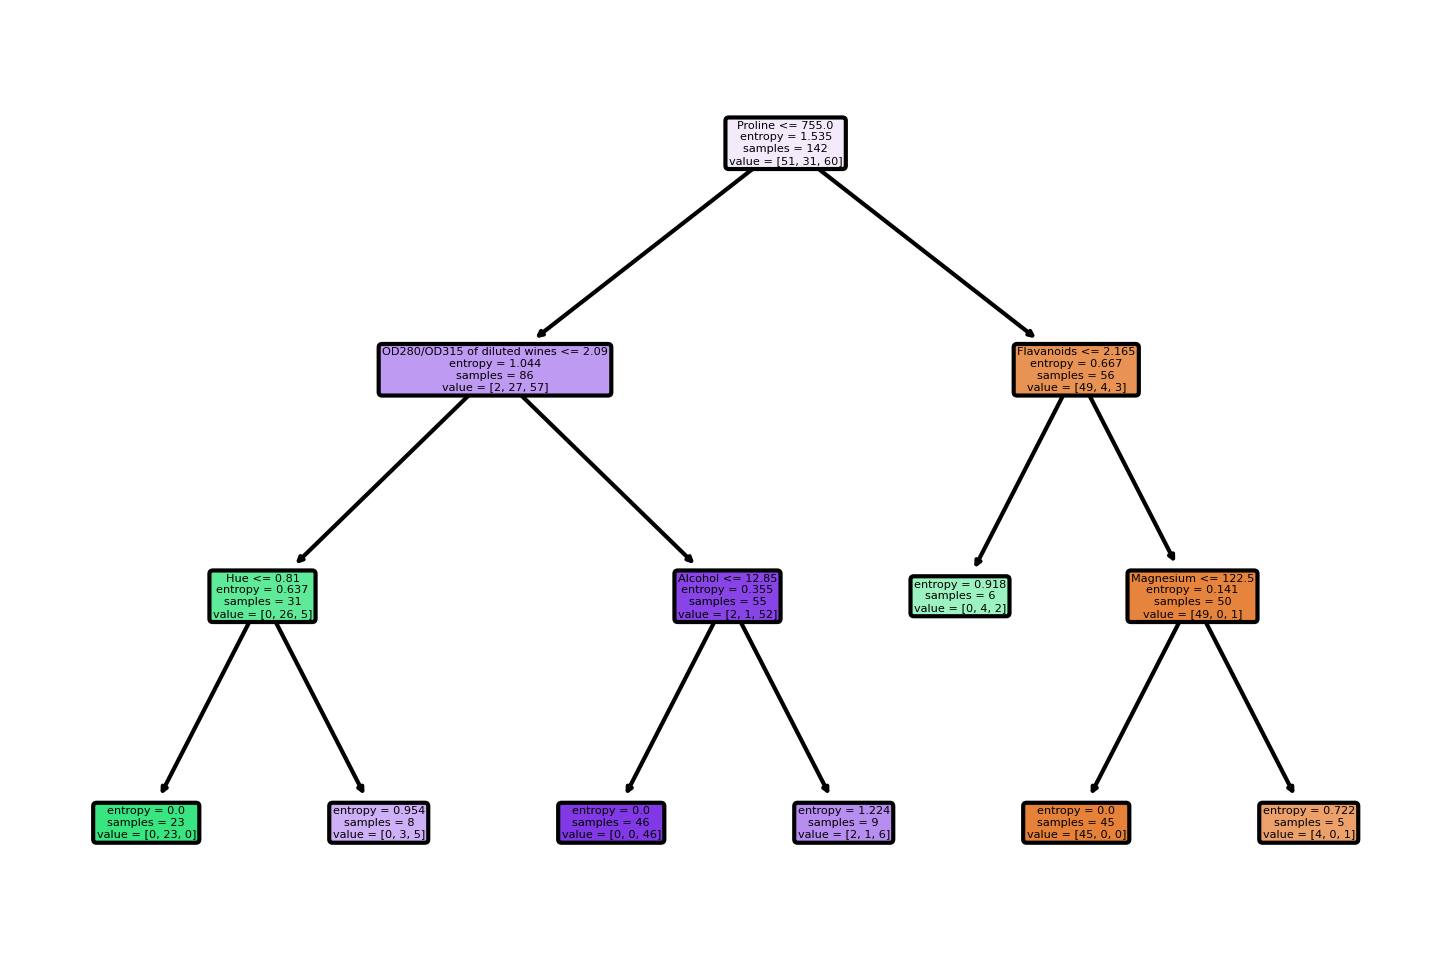

In [274]:
plt.figure(dpi=300)
plot_tree(dt2, feature_names=list(X), rounded=True, filled=True)
plt.show()

In [275]:
X_train, X_test, y_train, y_test=train_test_split(X_d, y, test_size=0.2, random_state=123)

In [276]:
dt3=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [277]:
y_pred_train=dt3.predict(X_train)

In [278]:
y_pred_test=dt3.predict(X_test)

In [279]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.77      0.97      0.86        31
           2       0.94      0.82      0.87        60

    accuracy                           0.90       142
   macro avg       0.89      0.92      0.90       142
weighted avg       0.91      0.90      0.90       142



In [280]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.94      1.00      0.97        17
           2       1.00      0.82      0.90        11

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [281]:
confusion_matrix(y_train, y_pred_train)

array([[49,  0,  2],
       [ 0, 30,  1],
       [ 2,  9, 49]])

In [282]:
confusion_matrix(y_test, y_pred_test)

array([[ 8,  0,  0],
       [ 0, 17,  0],
       [ 1,  1,  9]])

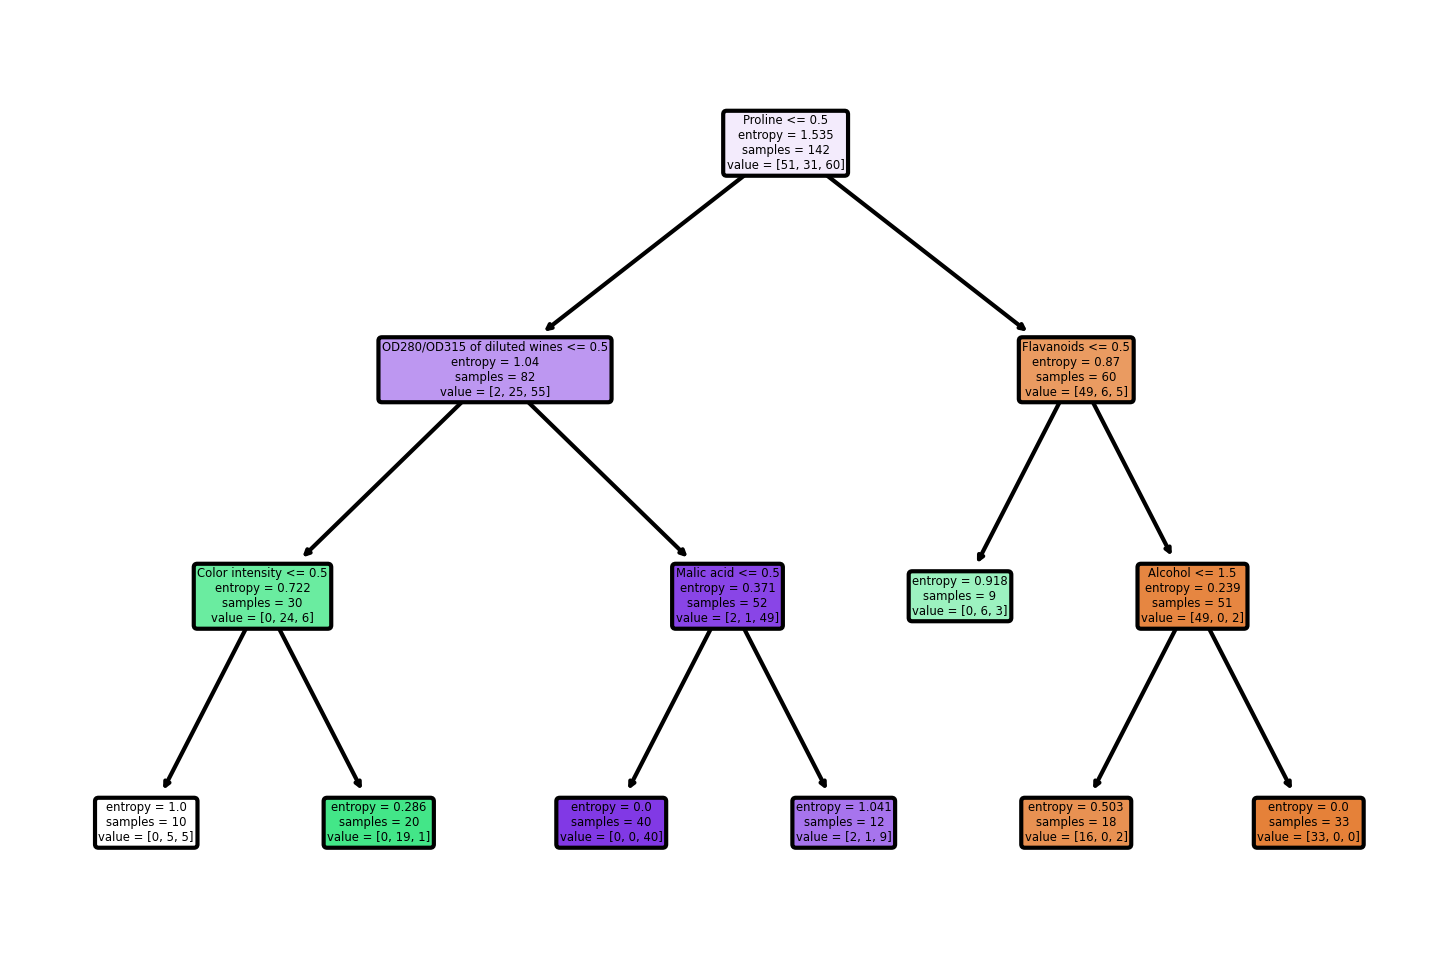

In [283]:
plt.figure(dpi=300)
plot_tree(dt3, feature_names=list(X), rounded=True, filled=True)
plt.show()

In [284]:
titanic=pd.read_csv('ML-datasets/titanic.csv')

In [285]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:
titanic2=titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [287]:
titanic2.dropna(subset=['Embarked'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [288]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [289]:
y=titanic2['Survived']
X=titanic2.loc[:,'Pclass':]

In [290]:
titanic2['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [291]:
X['Sex']=X['Sex'].astype('category').cat.codes

In [292]:
X['Embarked']=X['Embarked'].astype('category').cat.codes

In [293]:
X['Age'].fillna(X['Age'].median(), inplace=True)

In [294]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

In [295]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [296]:
y_pred_train=dt.predict(X_train)

In [297]:
y_pred_test=dt.predict(X_test)

In [298]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       443
           1       0.99      0.95      0.97       268

    accuracy                           0.98       711
   macro avg       0.98      0.97      0.98       711
weighted avg       0.98      0.98      0.98       711



In [299]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       106
           1       0.75      0.71      0.73        72

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



In [300]:
confusion_matrix(y_train, y_pred_train)

array([[441,   2],
       [ 13, 255]])

In [301]:
confusion_matrix(y_test, y_pred_test)

array([[89, 17],
       [21, 51]])

In [302]:
dt.get_depth()

19

In [303]:
dt.get_n_leaves()

169

In [304]:
from sklearn.metrics import roc_curve, roc_auc_score

In [305]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_test)

In [306]:
fpr

array([0.        , 0.16037736, 1.        ])

In [307]:
tpr

array([0.        , 0.70833333, 1.        ])

In [308]:
help_prob=[0 for _ in range(len(y_test))]

In [309]:
help_fpr, help_tpr, _=roc_curve(y_test, help_prob)

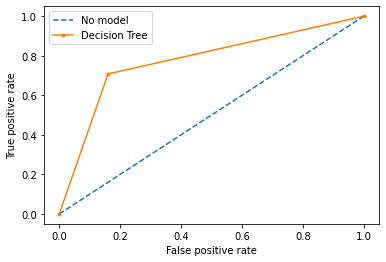

In [310]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [311]:
auc=roc_auc_score(y_test, y_pred_test)

In [312]:
print('AUC: %.3f' % auc)

AUC: 0.774


In [313]:
dt2=DecisionTreeClassifier(min_samples_split=15, class_weight='balanced')

In [314]:
dt2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=15)

In [315]:
y_pred_train=dt2.predict(X_train)
y_pred_test=dt2.predict(X_test)

In [316]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       443
           1       0.86      0.87      0.86       268

    accuracy                           0.90       711
   macro avg       0.89      0.89      0.89       711
weighted avg       0.90      0.90      0.90       711



In [317]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       106
           1       0.74      0.75      0.74        72

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



In [318]:
dt2.get_depth()

16

# Zespoły klasyfikatorów

## Bagging

In [319]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [320]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [321]:
clf1=BaggingClassifier(base_estimator=SVC(), n_estimators=5)

In [322]:
clf1.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=5)

In [323]:
y_pred_svm=clf1.predict(X_test)

In [324]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       106
           1       0.65      0.28      0.39        72

    accuracy                           0.65       178
   macro avg       0.65      0.59      0.57       178
weighted avg       0.65      0.65      0.60       178



In [325]:
confusion_matrix(y_test, y_pred_svm)

array([[95, 11],
       [52, 20]])

In [326]:
clf2=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)
clf2.fit(X_train, y_train)
y_pred_dt=clf2.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       106
           1       0.74      0.72      0.73        72

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [327]:
clf3=BaggingClassifier(base_estimator=MultinomialNB(), n_estimators=5)
clf3.fit(X_train, y_train)
y_pred_bayes=clf3.predict(X_test)
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       106
           1       0.62      0.43      0.51        72

    accuracy                           0.66       178
   macro avg       0.65      0.63      0.63       178
weighted avg       0.66      0.66      0.65       178



In [328]:
confusion_matrix(y_test, y_pred_bayes)

array([[87, 19],
       [41, 31]])

In [329]:
fpr_svm, tpr_svm, thresholds_svm=roc_curve(y_test, y_pred_svm)
fpr_dt, tpr_dt, thresholds_dt=roc_curve(y_test, y_pred_dt)
fpr_bayes, tpr_bayes, thresholds_bayes=roc_curve(y_test, y_pred_bayes)

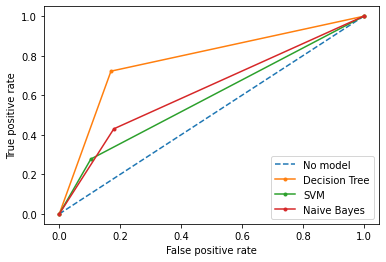

In [330]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM')
plt.plot(fpr_bayes, tpr_bayes, marker='.', label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [331]:
auc_svm=roc_auc_score(y_test, y_pred_svm)
auc_dt=roc_auc_score(y_test, y_pred_dt)
auc_bayes=roc_auc_score(y_test, y_pred_bayes)
print('AUC SVM: %.3f' % auc_svm)
print('AUC Decision Tree: %.3f' % auc_dt)
print('AUC Naive Bayes: %.3f' % auc_bayes)

AUC SVM: 0.587
AUC Decision Tree: 0.776
AUC Naive Bayes: 0.626


In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
clf=RandomForestClassifier(n_estimators=20, criterion='entropy', min_samples_split=10, class_weight='balanced')

In [334]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [335]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       106
           1       0.75      0.76      0.76        72

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178

